**DESAFIO FINAL BOOTCAMP ANALISTA DE MACHINE LEARNING**

In [ ]:
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import seaborn as sns #biblioteca utilizada para criar gráficos mais "bonitos"
import matplotlib.pyplot as plt #biblioteca para criar gráficos "comuns" ao estilo Matlab
import google

In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()
# arquivo de dados: cars.csv

Saving cars.csv to cars.csv


In [ ]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="cars.csv"
dataset_cars= pd.read_csv(nome_do_arquivo)

***Pré-processamento dos dados***

In [ ]:
dataset_cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [ ]:
dataset_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [ ]:
dataset_cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
dataset_cars.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [ ]:
#transformando as varáveis que estavam como string em número
dataset_cars['cubicinches'] = pd.to_numeric(dataset_cars['cubicinches'], errors='coerce')
dataset_cars['weightlbs'] = pd.to_numeric(dataset_cars['weightlbs'], errors='coerce')

In [ ]:
dataset_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [ ]:
dataset_cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,258.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,854.039019,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,2248.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,3670.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [ ]:
dataset_cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
nan_rows1 = dataset_cars[dataset_cars['cubicinches'].isnull()]
nan_rows2 = dataset_cars[dataset_cars['weightlbs'].isnull()]
nan_rows1, nan_rows2

(      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year brand
 40   16.0          6          NaN  105     3897.0          19  1976   US.
 180  19.8          6          NaN   85     2990.0          18  1980   US.,
       mpg  cylinders  cubicinches  hp  weightlbs  time-to-60  year     brand
 14   19.1          6        225.0  90        NaN          19  1981       US.
 33   21.0          6        199.0  90        NaN          15  1971       US.
 172  29.0          4         68.0  49        NaN          20  1974   Europe.)

In [ ]:
dataset_cars.fillna(dataset_cars.mean(), inplace=True)

In [ ]:
dataset_cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


**Correlação**

In [ ]:
dataset_corr=dataset_cars.copy(deep=True)  #criando uma cópia do dataset

In [ ]:
#deixando apenas com as colunas para fazer a correlação
drop=['brand']
dataset_corr.drop(drop, inplace=True, axis=1)

In [ ]:
#Cálculo da correlação para as variáveis selecionadas
corr=dataset_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
mpg,1.000000,-0.776710,-0.802379,-0.774905,-0.823800,0.509070,0.550441
cylinders,-0.776710,1.000000,0.951246,0.845155,0.894447,-0.578161,-0.322239
cubicinches,-0.802379,0.951246,1.000000,0.906413,0.925288,-0.610679,-0.349743
hp,-0.774905,0.845155,0.906413,1.000000,0.857125,-0.744873,-0.383869
weightlbs,-0.823800,0.894447,0.925288,0.857125,1.000000,-0.477240,-0.278683
time-to-60,0.509070,-0.578161,-0.610679,-0.744873,-0.477240,1.000000,0.312311
year,0.550441,-0.322239,-0.349743,-0.383869,-0.278683,0.312311,1.000000


**Detecção de anomalias**

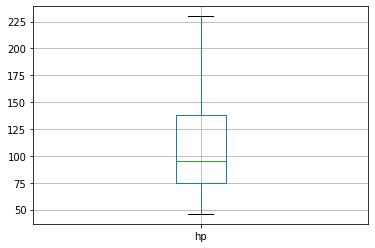

In [ ]:
dataset_corr.boxplot(column=['hp'])

**Processamento dos dados**

In [ ]:
# realiza o processo de normalização dos dados
from sklearn.preprocessing import StandardScaler
normaliza = StandardScaler()  #objeto que normaliza os dados
#normaliza.fit(dataset_corr)  #realiza a normalização dos dados
dataset_norm=normaliza.fit_transform(dataset_corr)

In [ ]:
dataset_norm[:,3].max()

3.05870398977614

**Redução da dimensionalidade (PCA)**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
cars_pca = pca.fit_transform(dataset_norm)
print(pca.explained_variance_ratio_)

[0.72371349 0.12675138 0.09126131 0.02773591 0.01766794 0.00798425
 0.00488572]


In [ ]:
cars_pca

array([[ 3.48521925,  0.5263255 , -0.13973834, ...,  0.08690179,
        -0.17920558,  0.07907785],
       [-2.17691231, -0.28542399, -1.3046126 , ..., -0.28969849,
        -0.04114712, -0.01312739],
       [ 2.6849731 ,  1.04694609, -0.73215552, ..., -0.53516815,
        -0.07574501,  0.15995575],
       ...,
       [-0.05384928, -1.58270559, -0.2851369 , ..., -0.30790924,
         0.49848823, -0.15274899],
       [ 0.78538633,  1.18244612,  0.60971526, ..., -0.20311094,
        -0.21777245, -0.1097028 ],
       [ 0.54934121, -0.22344808,  0.0834219 , ..., -0.1413986 ,
        -0.23267174, -0.22236514]])

In [ ]:
pca.components_

array([[-0.39506171,  0.41462456,  0.42751253,  0.42083433,  0.40887239,
        -0.3142291 , -0.2150062 ],
       [-0.19235786, -0.19070807, -0.16849764, -0.08613966, -0.2292615 ,
        -0.02652165, -0.9151793 ],
       [-0.2680554 ,  0.1391496 ,  0.10340802, -0.185907  ,  0.31224967,
         0.87177683, -0.07768119],
       [ 0.78492487,  0.41897225,  0.30488383,  0.03359866, -0.06717148,
         0.14290115, -0.29889703],
       [ 0.25375313, -0.57284721, -0.04443588,  0.68664366,  0.29119507,
         0.21066934, -0.06946382],
       [-0.23036388,  0.16557147,  0.13987454,  0.48340333, -0.75927279,
         0.27232377,  0.12497802],
       [ 0.03880446,  0.49117076, -0.8146501 ,  0.27318464,  0.13023416,
         0.03999117, -0.02001608]])

**Algoritmos supervisionados e não supervisionados**

In [ ]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=3,random_state=42)
clusters.fit(cars_pca[:,:2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
clusters.cluster_centers_

array([[-0.26236327,  0.38569325],
       [ 3.08082252, -0.19838979],
       [-2.24347328, -0.23234707]])

In [ ]:
clusters.labels_

array([1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0,
       0, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0,
       2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1,
       0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2,
       1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 1,
       0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0,
       1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0],
      dtype=int32)

In [ ]:
np.unique(clusters.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([94, 75, 92]))

Trsnformando a variável MPG em binária:

In [ ]:
dataset_cars['eficiencia']=np.where(dataset_cars['mpg']>25,1,0)

dataset_cars['eficiencia'].value_counts()

0    162
1     99
Name: eficiencia, dtype: int64

In [ ]:
dataset_cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,eficiencia
0,14.0,8,350.0,165,4209.0,12,1972,US.,0
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,1
2,17.0,8,302.0,140,3449.0,11,1971,US.,0
3,15.0,8,400.0,150,3761.0,10,1971,US.,0
4,30.5,4,98.0,63,2051.0,17,1978,US.,1


**Árvore de Decisão**

In [ ]:
#'cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60'
entradas = dataset_cars.iloc[:,1:6]
saida = dataset_cars.iloc[:,-1]

In [ ]:
normaliza = StandardScaler()  #objeto que normaliza os dados
entrada_norm = normaliza.fit_transform(entradas)

In [ ]:
#aplicando o divisão do dataset entre dados de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entrada_norm, saida, test_size=0.30,random_state=42)

In [ ]:
#árvore de decisão
from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier(random_state=42)

clf_arvore = clf_arvore.fit(X_train,y_train)

y_pred_arvore = clf_arvore.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Acurácia para a classificação utilizando o AD:  ",accuracy_score(y_pred_arvore,y_test))

Acurácia para a classificação utilizando o AD:   0.8734177215189873


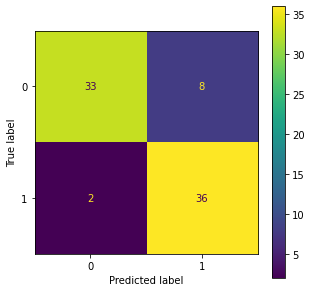

In [ ]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"]=(5, 5)
plot_confusion_matrix(clf_arvore, X_test, y_test)
plt.show()

**Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

In [ ]:
clf_log = LogisticRegression(random_state=42)

clf_log = clf_log.fit(X_train,y_train)

y_pred_log = clf_log.predict(X_test)

In [ ]:
print("Acurácia para a classificação utilizando o Reg. Logística:  ",accuracy_score(y_pred_log,y_test))

Acurácia para a classificação utilizando o Reg. Logística:   0.8607594936708861


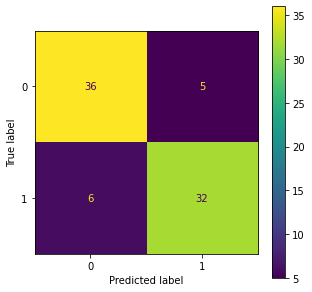

In [ ]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"]=(5, 5)
plot_confusion_matrix(clf_log, X_test, y_test)
plt.show()